In [24]:
import pickle
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

In [2]:
with open('entries/csa3d_0001.ent', 'rb') as f:
    entry = pickle.load(f)

In [5]:
sitelist = [s for s in entry.get_pdbsites(sane_only=True) if  (s.is_conserved or s.is_conservative_mutation)]
matrix = entry.rmsd_matrix(sitelist)

In [6]:
Z, clusters = entry.clustering(matrix)

/Users/riziotis/ebi/csa3d/Entry.py:145: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method='average')


In [22]:
h = 0.2*max(Z[:,2])
h

4.6447864077650625

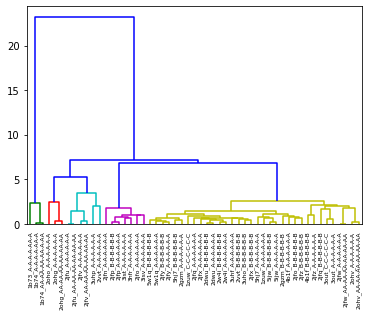

In [21]:
fig, ax = plt.subplots()
den = dendrogram(Z, labels=matrix.index, ax=ax, color_threshold=h)

In [45]:
from dynamicTreeCut import cutreeHybrid
distances = pdist(matrix, "euclidean")
clusters = cutreeHybrid(Z, distances)
distances

..cutHeight not given, setting it to 22.99291717853578  ===>  99% of the (truncated) height range in dendro.
..done.


array([2.19044813e+01, 2.19640561e+01, 2.49735681e+01, ...,
       5.78352793e+00, 5.78302053e+00, 2.23601253e-03])

In [44]:
clusters['labels']

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])